 # Introduction

The idea of this work is to predict when a Campaign will be considered as good.
A good campaign is considered good when the depositors rate is at least 2%.


Since we want to predict if a campaign will be good or not, we are in a classification problem.
Then the idea is to use different types of classifiers and the use voting to select the output.
The classifiers used here are: 
- Logistic regression.
- Random Forest.
- XGBoost.
- MultiPerception Neural Network Classifier (Deep Learning)


## Why we used this models:
 - ### Logistic regression: It's the simplest classifier and is fast.
 - ### Random Forest: Is intuitive, work well with unbalanced data.
 - ### XGBoost: a fast boosting implementation of decision trees.
 - ### MultiPerception Neural Network Classifier (Deep Learning): 

# Results:
- ### Using a soft voting classifier the ROC for the test is 0.984.
- ### Using a threshold of 0.5 the total  True Positive (TP) is 267, a False Positive (FP) of 976 and a  False Negative (FN) of 86 with True Negative (TN) of 27607 for the test set.
- ### The test set has 320 Positives/True cases and 28583 Negative/False cases.
![ROC](roc.png)


# How to improve:
- The cross-features can help to get a better result on tree based model (XGBoost and Random Forest) and also can do the same on Neural Network.
- Polynomic Features can also improve the result.
- Build a deeper Neural Network, a deeper network will learn better the relations between target and features.
- Maybe do some PCA will give better results.
- Outliers detection can improve the results, however I didn't icluded this since the improvements were really small. 
- Maybe 0.5 is not the best threshold, for example we can choose the threshold such that we choose the closest point to (0,1) in the ROC curve, however this can give a worst False Positive Rate in some cases.

## Import some basic libraries and load the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
input_data = pd.read_csv('data.csv')
input_data.head(5)

,Campaign,Game,Affiliate,Platform,Country,Impressions,Clicks,Installs,FiveBattles,FiveLevels,ClanJoins,FiveMinutes,TenMinutes,DayOneRetentions,DaySevenRetentions,DayThirtyRetentions,Spend,Depositors,Deposits,DepositAmount
0,Campaign 16881,Vikings,Affiliate 3,Web,US,6396124,19440,465,0,13,13,154,109,24,0,0,13138.68,27,1971,12811.50
1,Campaign 17647,Vikings,Affiliate 3,Web,US,11814535,17551,589,0,15,32,182,126,32,15,0,11963.65,57,1437,14355.63
2,Campaign 17768,Vikings,Affiliate 3,Web,US,7848002,10212,335,2,4,10,128,76,13,4,0,6447.29,4,21,136.50
3,Campaign 3669,Terminator,Affiliate 1,iOS,US,364361,1070,237,6,4,8,58,39,30,15,0,6438.04,8,26,259.74
4,Campaign 3701,Terminator,Affiliate 1,iOS,US,391893,1095,195,6,8,8,43,35,30,8,0,6435.58,2,17,110.50


## Define new features and the target feature:
-  click_impressions_rate is the numer of clicks dived by the Impressions, give us an estimate of how many times the banner was clicked per each view
-  installRate is how many install in average we have for each click

In [3]:
input_data['deposit_rate'] = input_data['Depositors'] / input_data['Installs']
input_data['click_impressions_rate'] = input_data['Clicks'] / input_data['Impressions']
input_data['install_rate'] = input_data['Installs'] / input_data['Clicks']
input_data = input_data.replace([np.inf, -np.inf], np.nan)
input_data = input_data.fillna(0.0)    
input_data['is_good_campaign'] = input_data['deposit_rate'] > 0.02
input_data.head(5)

,Campaign,Game,Affiliate,Platform,Country,Impressions,Clicks,Installs,FiveBattles,FiveLevels,...,DaySevenRetentions,DayThirtyRetentions,Spend,Depositors,Deposits,DepositAmount,deposit_rate,click_impressions_rate,installRate,is_good_campaign
0,Campaign 16881,Vikings,Affiliate 3,Web,US,6396124,19440,465,0,13,...,0,0,13138.68,27,1971,12811.50,0.058065,0.003039,0.023920,True
1,Campaign 17647,Vikings,Affiliate 3,Web,US,11814535,17551,589,0,15,...,15,0,11963.65,57,1437,14355.63,0.096774,0.001486,0.033559,True
2,Campaign 17768,Vikings,Affiliate 3,Web,US,7848002,10212,335,2,4,...,4,0,6447.29,4,21,136.50,0.011940,0.001301,0.032805,False
3,Campaign 3669,Terminator,Affiliate 1,iOS,US,364361,1070,237,6,4,...,15,0,6438.04,8,26,259.74,0.033755,0.002937,0.221495,True
4,Campaign 3701,Terminator,Affiliate 1,iOS,US,391893,1095,195,6,8,...,8,0,6435.58,2,17,110.50,0.010256,0.002794,0.178082,False


In [4]:
import seaborn as sns

### Here we can see how unbalanced the data is (by Country):

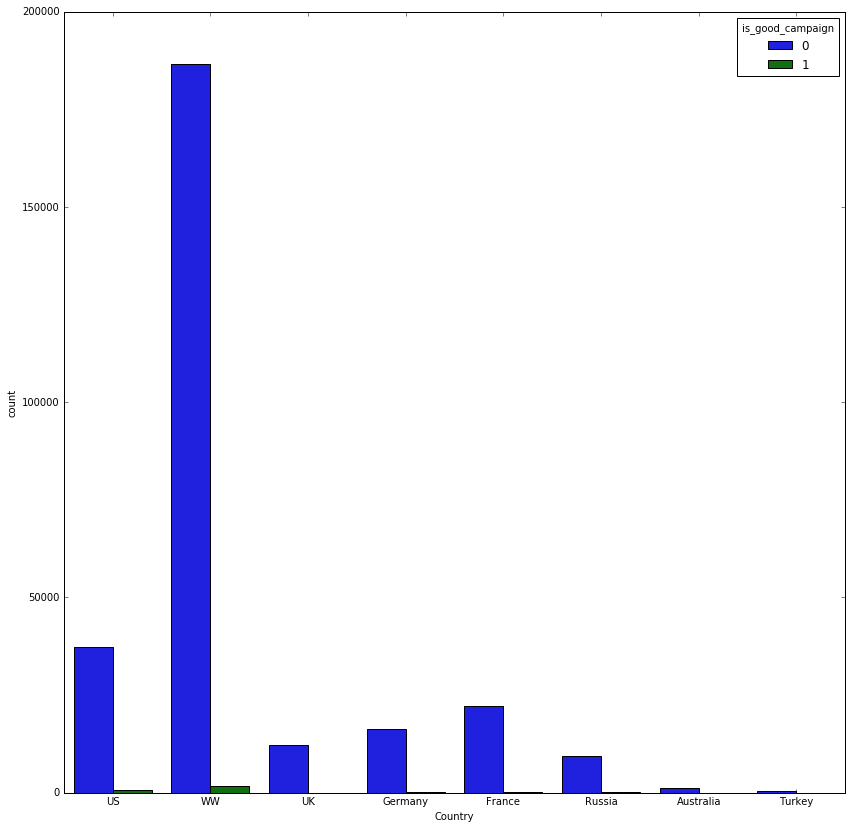

In [11]:
plt.figure(figsize=(14,14))
sns.countplot(x='Country',hue="is_good_campaign",data=input_data*1)
plt.show()

## Let's explore the data a little bit:

In [15]:
good_game=input_data[input_data["is_good_campaign"]==True]

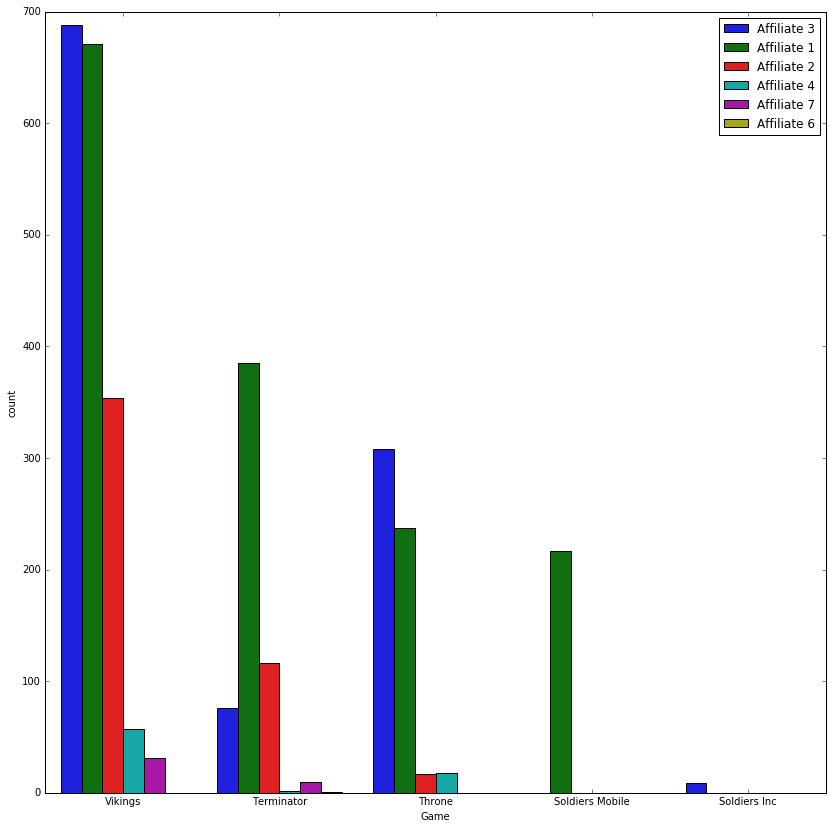

In [18]:
plt.figure(figsize=(14,14))
sns.countplot(x='Game',hue="Affiliate",data=good_game*1)
plt.legend(loc='upper right')
plt.show()

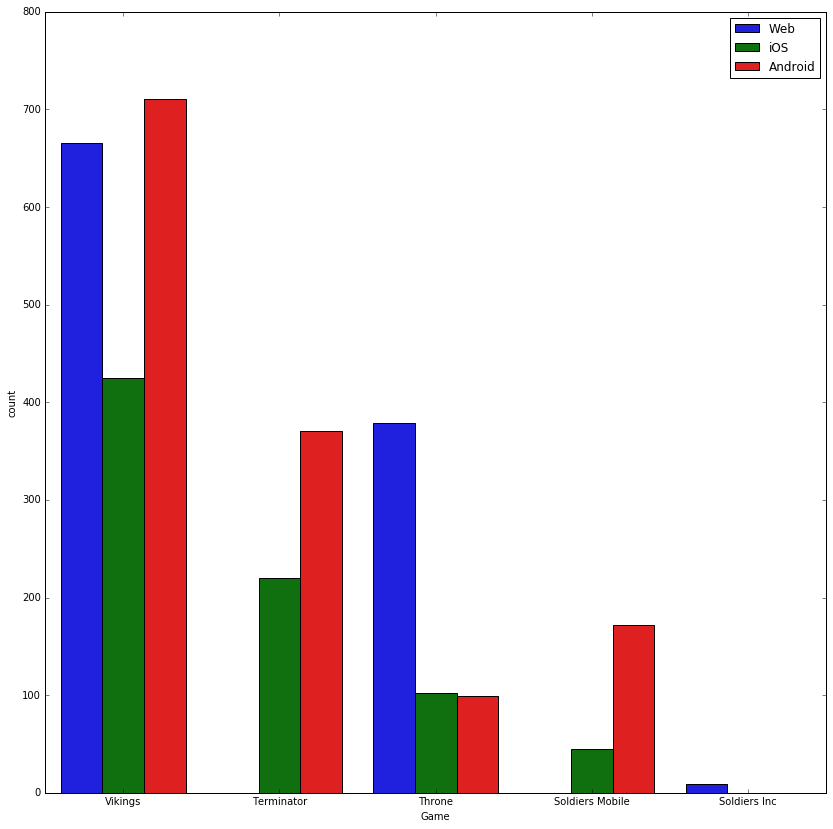

In [19]:
plt.figure(figsize=(14,14))
sns.countplot(x='Game',hue="Platform",data=good_game*1)
plt.legend(loc='upper right')
plt.show()

# Data preparation

- ## Transform categorical data to numerical

In [20]:
categorical_cols = ['Game', 'Affiliate', 'Platform', 'Country']
input_data = pd.get_dummies(input_data, prefix=categorical_cols, columns=categorical_cols) 

In [21]:
input_data.head(5)

,Campaign,Impressions,Clicks,Installs,FiveBattles,FiveLevels,ClanJoins,FiveMinutes,TenMinutes,DayOneRetentions,...,Platform_Web,Platform_iOS,Country_Australia,Country_France,Country_Germany,Country_Russia,Country_Turkey,Country_UK,Country_US,Country_WW
0,Campaign 16881,6396124,19440,465,0,13,13,154,109,24,...,1,0,0,0,0,0,0,0,1,0
1,Campaign 17647,11814535,17551,589,0,15,32,182,126,32,...,1,0,0,0,0,0,0,0,1,0
2,Campaign 17768,7848002,10212,335,2,4,10,128,76,13,...,1,0,0,0,0,0,0,0,1,0
3,Campaign 3669,364361,1070,237,6,4,8,58,39,30,...,0,1,0,0,0,0,0,0,1,0
4,Campaign 3701,391893,1095,195,6,8,8,43,35,30,...,0,1,0,0,0,0,0,0,1,0


- ## Choosing features

In [22]:
columns_to_drop = ['Depositors', 'Deposits', 'DepositAmount', 'Campaign', 'deposit_rate', 'is_good_campaign']
features = sorted(list(set(input_data.columns) - set(columns_to_drop)))
features

['Affiliate_Affiliate 1',
 'Affiliate_Affiliate 2',
 'Affiliate_Affiliate 3',
 'Affiliate_Affiliate 4',
 'Affiliate_Affiliate 5',
 'Affiliate_Affiliate 6',
 'Affiliate_Affiliate 7',
 'ClanJoins',
 'Clicks',
 'Country_Australia',
 'Country_France',
 'Country_Germany',
 'Country_Russia',
 'Country_Turkey',
 'Country_UK',
 'Country_US',
 'Country_WW',
 'DayOneRetentions',
 'DaySevenRetentions',
 'DayThirtyRetentions',
 'FiveBattles',
 'FiveLevels',
 'FiveMinutes',
 'Game_Soldiers Inc',
 'Game_Soldiers Mobile',
 'Game_Terminator',
 'Game_Throne',
 'Game_Vikings',
 'Impressions',
 'Installs',
 'Platform_Android',
 'Platform_Web',
 'Platform_iOS',
 'Spend',
 'TenMinutes',
 'click_impressions_rate',
 'installRate']

- ## Final data preparation:
1. #### Divide data into input (X) and output (y)
2. #### Split the data into training and testing set (with same distribution of classes as the original)
3. #### Scale data (only for the Neural Network Clasifier)

In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
target = ['is_good_campaign']

X = input_data[features]
y = input_data[target]
#X = df_upsampled[features]
#y = df_upsampled[target]


#X = crossed_features[features]
#y = crossed_features[target]
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled)
sss = StratifiedShuffleSplit(2,train_size=0.8, random_state=1132)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1132)
i1,i2=sss.split(X,y)
X_train=X.iloc[i1[0]]
X_test=X.iloc[i1[1]]
y_train=y.iloc[i1[0]]
y_test=y.iloc[i1[1]]

#c1,c2=sss.split(X_scaled,y)
X_train_scaled=X_scaled.iloc[i1[0]]
X_test_scaled=X_scaled.iloc[i1[1]]
y_train_scaled=y.iloc[i1[0]]
y_test_scaled=y.iloc[i1[1]]



print X_train.shape, X_test.shape, y_train.shape, y_test.shape
print'% of True in train label: ' + str(y_train.sum() / len(y_train))
print'% of True in test label: ' + str(y_test.sum() / len(y_test))
print'% of True in train label: ' + str(y_train_scaled.sum() / len(y_train_scaled))
print'% of True in test label: ' + str(y_test_scaled.sum() / len(y_test_scaled))

(231218, 37) (28903, 37) (231218, 1) (28903, 1)
% of True in train label: is_good_campaign    0.011063
dtype: float64
% of True in test label: is_good_campaign    0.011072
dtype: float64
% of True in train label: is_good_campaign    0.011063
dtype: float64
% of True in test label: is_good_campaign    0.011072
dtype: float64


On both training and testing set near 1% of the data is True (is a good campaign) and 99% of the data is False.

## The data is not balanced:
- ### Accuracy is not a good evaluation metric
- ### We want to have the best convination of precision and recall, then we will use the F1 evaluation metric

## Simple logistic regression:
### With simple threshold of 0.5.
- The big C is equivalent to Logistic regression without regularization
- Since the data is unbalanced we need to tell the classifier.

In [108]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

class_weight = {False:0.01, True:0.99}

lr = linear_model.LogisticRegression(penalty = 'l2',
                                     class_weight=class_weight,
                                     solver = 'liblinear',
                                     C = 10000000,
                                     )
lr = lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
print 'Train ROCAUC:' + str(roc_auc_score(y_train, train_pred))
print 'Test ROCAUC:' + str(roc_auc_score(y_test, test_pred))

Train ROCAUC:0.911623609612
Test ROCAUC:0.912466435469


In [109]:
confusion_matrix(y_test,test_pred)

array([[26616,  1967],
       [   34,   286]])

### Random search for best regularization streng (1/C):
- StratifiedKFold is used for cross-validation.
- We search using a RandomizedSearchCV, instead of a Grid.

In [70]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
kf=StratifiedKFold(n_splits=10)


In [52]:
lr_search = linear_model.LogisticRegression(penalty = 'l2',
                                     class_weight=class_weight,
                                     solver = 'liblinear') 
param_dist = {"C": np.logspace(-4, 1), "class_weight":[{False:0.01, True:0.99}]}
n_iter_search = 10
random_search_lr = RandomizedSearchCV(lr_search, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='f1',cv=kf)
random_search_lr.fit(X_train, list(y_train['is_good_campaign']))


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
          error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight={False: 0.01, True: 0.99}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'C': array([  1.00000e-04,   1.26486e-04,   1.59986e-04,   2.02359e-04,
         2.55955e-04,   3.23746e-04,   4.09492e-04,   5.17947e-04,
         6.55129e-04,   8.28643e-04,   1.04811e-03,   1.32571e-03,
         1.67683e-03,   2.12095e-03,   2.68270e-03,   3.39322e-03,
      ...,   6.25055e+00,
         7.90604e+00,   1.00000e+01]), 'class_weight': [{False: 0.01, True: 0.99}]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scor

In [53]:
random_search_lr.best_params_

{'C': 0.022229964825261957, 'class_weight': {False: 0.01, True: 0.99}}

In [64]:
lr_regularizated = linear_model.LogisticRegression(C=random_search_lr.best_params_['C'],penalty = 'l2',class_weight=class_weight,solver = 'liblinear') 
lr_regularizated=lr_regularizated.fit(X_train,y_train)

### Results:

In [65]:
train_pred_logistic = lr_regularizated.predict(X_train)
test_pred_logistic = lr_regularizated.predict(X_test)
print 'Train ROCAUC:' + str(roc_auc_score(y_train, train_pred_logistic))
print 'Test ROCAUC:' + str(roc_auc_score(y_test, test_pred_logistic))

Train ROCAUC:0.908785847341
Test ROCAUC:0.909052911696


In [81]:
confusion_matrix(y_test,test_pred_logistic)

array([[25349,  3234],
       [   22,   298]])

## Let's check what happend when we do the searching on a grid.

In [76]:
lr_gridsearch = linear_model.LogisticRegression(penalty = 'l2',
                                     class_weight=class_weight,
                                     solver = 'liblinear') 
param_dist = {"C": np.logspace(-4, 1,10), "class_weight":[{False:0.01, True:0.99}]}
gridsearch_lr = GridSearchCV(lr_gridsearch, param_grid=param_dist,scoring='f1',cv=kf)
gridsearch_lr.fit(X_train, list(y_train['is_good_campaign']))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight={False: 0.01, True: 0.99}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-04,   3.59381e-04,   1.29155e-03,   4.64159e-03,
         1.66810e-02,   5.99484e-02,   2.15443e-01,   7.74264e-01,
         2.78256e+00,   1.00000e+01]), 'class_weight': [{False: 0.01, True: 0.99}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [77]:
gridsearch_lr.best_params_

{'C': 0.001291549665014884, 'class_weight': {False: 0.01, True: 0.99}}

In [78]:
lr_regularizated_new= linear_model.LogisticRegression(C=gridsearch_lr.best_params_['C'],penalty = 'l2',class_weight=class_weight,solver = 'liblinear') 
lr_regularizated_new=lr_regularizated_new.fit(X_train,y_train)


### Results:

In [79]:
train_pred_logistic_grid = lr_regularizated.predict(X_train)
test_pred_logistic_grid = lr_regularizated.predict(X_test)
print 'Train ROCAUC:' + str(roc_auc_score(y_train, train_pred_logistic_grid))
print 'Test ROCAUC:' + str(roc_auc_score(y_test, test_pred_logistic_grid))

Train ROCAUC:0.908785847341
Test ROCAUC:0.909052911696


In [82]:
confusion_matrix(y_test,test_pred_logistic_grid)

array([[25349,  3234],
       [   22,   298]])

### Conclusions:
- There is no difference between them, at least for the test set.
- Most of the positive cases are detected as positive (298 of 320).
- The number of False Positive is relative big (3234).

# Random Forest:

In [85]:
from sklearn.ensemble import RandomForestClassifier


## Out of the box (no change in the parameters)

In [87]:
rf=RandomForestClassifier(class_weight={False:0.01, True:0.99})
rf=rf.fit(X_train,y_train)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Results:

In [89]:
rf_pred_test=rf.predict(X_test)

In [90]:
confusion_matrix(y_test,rf_pred_test)

array([[28536,    47],
       [  269,    51]])

## Randomized search of parameters for better classification:

In [97]:
from scipy.stats import randint as sp_randint
rf_randomsearch=RandomForestClassifier(class_weight = {False:0.01, True:0.99})

In [99]:
param_dist = {"max_depth": [10, None],
              "n_estimators": sp_randint(10, 200), "class_weight":[{False:0.01, True:0.99}]}
n_iter_search = 20
random_search = RandomizedSearchCV(rf_randomsearch, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='f1',cv=kf)
random_search.fit(X_train, list(y_train['is_good_campaign']))


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight={False: 0.01, True: 0.99},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4572324050>, 'max_depth': [10, None], 'class_weight': [{False: 0.01, True: 0.99}]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='f1', verbose=0)

### Results:

In [100]:
random_search.best_params_

{'class_weight': {False: 0.01, True: 0.99},
 'max_depth': None,
 'n_estimators': 59}

In [101]:
random_rf=RandomForestClassifier(n_estimators=random_search.best_params_['n_estimators'],max_depth=random_search.best_params_['max_depth'],class_weight = {False:0.01, True:0.99})
random_rf=random_rf.fit(X_train,y_train)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [102]:
random_rf_pred_test=random_rf.predict(X_test)

In [103]:
confusion_matrix(y_test,random_rf_pred_test)

array([[28547,    36],
       [  267,    53]])

### Conclusions:
- Small number of False Positive (36).
- However also the number of True Positives is small (53), of the 320 real positive, 267 are detected as negative. 

# XGBOOST
- ### We will not investigate the "out of the box" classifier, we will search the best one.

In [112]:
from xgboost import XGBClassifier
xgb=XGBClassifier(scale_pos_weight=99)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [114]:
param_dist = {"n_estimators": sp_randint(10, 200),"learning_rate":[0.001,0.01,0.1],"scale_pos_weight":[99]}
n_iter_search = 20
xgb_random_search = RandomizedSearchCV(xgb, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='precision',cv=kf)

In [115]:
xgb_random_search.fit(X_train, list(y_train['is_good_campaign']))


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=99, seed=0, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f455e6f9dd0>, 'scale_pos_weight': [99], 'learning_rate': [0.001, 0.01, 0.1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='precision', verbose=0)

### Results:

In [118]:
xgb_random_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 194, 'scale_pos_weight': 99}

In [124]:
xgb_rs=XGBClassifier(learning_rate=xgb_random_search.best_params_['learning_rate'],scale_pos_weight=99,n_estimators=xgb_random_search.best_params_['n_estimators'])
xgb_rs=xgb_rs.fit(X_train,y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
random_xgb_pred_test=xgb_rs.predict(X_test)

In [126]:
confusion_matrix(y_test,random_xgb_pred_test)

array([[26821,  1762],
       [    7,   313]])

## Conclusion:
- This classifier predict as positive most of the positive cases (313 of 320) for the test set.
- However False Positive Rate is relative big (1762).
- But work better than the logistic regression.

# Neural Network (Deep Learning)

## Shallow Neural Network:
- Not used in the final voting classifier.

In [127]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

Using TensorFlow backend.


In [129]:
X_test_new=X_test_scaled.values
X_train_new=X_train_scaled.values
y_test_new=y_test_scaled.values*1
y_train_new=y_train_scaled.values*1

In [130]:
shallow = Sequential()
shallow.add(Dense(100, input_dim=37, kernel_initializer='normal', activation='relu'))
shallow.add(Dense(300, kernel_initializer='normal', activation='relu'))#300
#model.add(Dense(600, kernel_initializer='normal', activation='relu'))#500
#model.add(Dense(600, kernel_initializer='normal', activation='relu'))#500
shallow.add(Dense(300, kernel_initializer='normal', activation='relu'))#500
shallow.add(Dense(39, kernel_initializer='normal', activation='relu'))#300
shallow.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
shallow.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
shallow.fit(X_train_new,y_train_new,batch_size=100,nb_epoch=4)

/usr/local/lib/python2.7/dist-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/4

 72400/231218 [========>.....................] - ETA: 30s - loss: 0.0483 - acc: 0.9877


145300/231218 [=================>............] - ETA: 15s - loss: 0.0407 - acc: 0.9881


216500/231218 [===========================>..] - ETA: 2s - loss: 0.0372 - acc: 0.9887


231218/231218 [==============================] - ETA: 0s - loss: 0.0368 - acc: 0.9887
Epoch 2/4

 57800/231218 [======>.......................] - ETA: 30s - loss: 0.0304 - acc: 0.9896


129000/231218 [===============>..............] - ETA: 18s - loss: 0.0303 - acc: 0.9896


202800/231218 [=========================>....] - ETA: 5s - loss: 0.0307 - acc: 0.9894


231218/231218 [==============================] - ETA: 0s - loss: 0.0305 - acc: 0.9895
Epoch 3/4

 41600/231218 [====>.........................] - ETA: 33s - loss: 0.0302 - acc: 0.9899


113800/231218 [=============>................] - ETA: 21s - loss: 0.0298 - acc: 0.9896


185000/231218 [=======================>......] - ETA: 8s - loss: 0.0299 - acc: 0.9896


231218/231218 [==============================] - ETA: 0s - loss: 0.0298 - acc: 0.9896
Epoch 4/4

 26300/231218 [==>...........................] - ETA: 36s - loss: 0.0259 - acc: 0.9909


100100/231218 [===========>..................] - ETA: 23s - loss: 0.0285 - acc: 0.9899


173600/231218 [=====================>........] - ETA: 10s - loss: 0.0289 - acc: 0.9895


231218/231218 [==============================] - ETA: 0s - loss: 0.0292 - acc: 0.9895


In [135]:
shallow.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               3800      
_________________________________________________________________
dense_7 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_8 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_9 (Dense)              (None, 39)                11739     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 40        
Total params: 136,179
Trainable params: 136,179
Non-trainable params: 0
_________________________________________________________________


### Results (with threshold of 0.5):

In [132]:
y_pred_shallow=shallow.predict(X_test_new)

In [133]:
y_pred_shallow=y_pred_shallow>0.5

In [134]:
confusion_matrix(y_test_new,y_pred_shallow)

array([[28535,    48],
       [  248,    72]])

### Conclusions:
- Fast.
- Similar preformance to Random Forest.

In [171]:
from keras import backend as K
K.clear_session()

## Deeper Neural Network

In [177]:
deep = Sequential()
deep.add(Dense(100, input_dim=37, kernel_initializer='normal', activation='relu'))
deep.add(Dense(300, kernel_initializer='normal', activation='relu'))#300
deep.add(Dense(500, kernel_initializer='normal', activation='relu'))#500
deep.add(Dense(1000, kernel_initializer='normal', activation='relu'))#no
deep.add(Dense(300, kernel_initializer='normal', activation='relu'))#300
deep.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
deep.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
deep.fit(X_train_new,y_train_new,batch_size=500,nb_epoch=100,class_weight={False:0.01,True:0.99})

Epoch 1/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0054 - acc: 0.8750
Epoch 2/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0041 - acc: 0.8806
Epoch 3/100

132500/231218 [================>.............] - ETA: 1s - loss: 0.0039 - acc: 0.8887


231218/231218 [==============================] - ETA: 0s - loss: 0.0039 - acc: 0.8844
Epoch 4/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0037 - acc: 0.8945
Epoch 5/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0036 - acc: 0.8961
Epoch 6/100

 84500/231218 [=========>....................] - ETA: 2s - loss: 0.0035 - acc: 0.9013


231218/231218 [==============================] - ETA: 0s - loss: 0.0036 - acc: 0.8979
Epoch 7/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0035 - acc: 0.8963
Epoch 8/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0034 - acc: 0.9063
Epoch 9/100

 39000/231218 [====>.........................] - ETA: 3s - loss: 0.0034 - acc: 0.8998


231218/231218 [==============================] - ETA: 0s - loss: 0.0034 - acc: 0.9028
Epoch 10/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0034 - acc: 0.9048
Epoch 11/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0035 - acc: 0.8984
Epoch 12/100



231218/231218 [==============================] - ETA: 0s - loss: 0.0035 - acc: 0.9021
Epoch 13/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9038
Epoch 14/100

193000/231218 [========================>.....] - ETA: 0s - loss: 0.0033 - acc: 0.9063


231218/231218 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9075
Epoch 15/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9107
Epoch 16/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9097
Epoch 17/100

150500/231218 [==================>...........] - ETA: 1s - loss: 0.0032 - acc: 0.9091


231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9103
Epoch 18/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9072
Epoch 19/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9153
Epoch 20/100

105500/231218 [============>.................] - ETA: 1s - loss: 0.0031 - acc: 0.9096


231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9124
Epoch 21/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0034 - acc: 0.9116
Epoch 22/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9080
Epoch 23/100

 55500/231218 [======>.......................] - ETA: 2s - loss: 0.0031 - acc: 0.9095


231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9122
Epoch 24/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9160
Epoch 25/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9058
Epoch 26/100

 11000/231218 [>.............................] - ETA: 3s - loss: 0.0031 - acc: 0.9065


231218/231218 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9065
Epoch 27/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0038 - acc: 0.9020
Epoch 28/100

207000/231218 [=========================>....] - ETA: 0s - loss: 0.0033 - acc: 0.9095


231218/231218 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9101
Epoch 29/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0034 - acc: 0.9092
Epoch 30/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9161
Epoch 31/100

165000/231218 [====================>.........] - ETA: 1s - loss: 0.0031 - acc: 0.9177


231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9162
Epoch 32/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9139
Epoch 33/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9175
Epoch 34/100

123000/231218 [==============>...............] - ETA: 1s - loss: 0.0033 - acc: 0.9073


231218/231218 [==============================] - ETA: 0s - loss: 0.0036 - acc: 0.9061
Epoch 35/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0035 - acc: 0.9026
Epoch 36/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9119
Epoch 37/100

 77500/231218 [=========>....................] - ETA: 2s - loss: 0.0031 - acc: 0.8957


231218/231218 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9041
Epoch 38/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9151
Epoch 39/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0039 - acc: 0.9051
Epoch 40/100

 32000/231218 [===>..........................] - ETA: 3s - loss: 0.0029 - acc: 0.9152


231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9142
Epoch 41/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9169
Epoch 42/100

220500/231218 [===========================>..] - ETA: 0s - loss: 0.0030 - acc: 0.9209


231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9208
Epoch 43/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9215
Epoch 44/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9214
Epoch 45/100

171500/231218 [=====================>........] - ETA: 0s - loss: 0.0031 - acc: 0.9277


231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9263
Epoch 46/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0034 - acc: 0.9223
Epoch 47/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9243
Epoch 48/100

126500/231218 [===============>..............] - ETA: 1s - loss: 0.0034 - acc: 0.9221


231218/231218 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9203
Epoch 49/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9242
Epoch 50/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9271
Epoch 51/100

 81000/231218 [=========>....................] - ETA: 2s - loss: 0.0033 - acc: 0.9227


231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9191
Epoch 52/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0030 - acc: 0.9250
Epoch 53/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0029 - acc: 0.9278
Epoch 54/100

 35500/231218 [===>..........................] - ETA: 3s - loss: 0.0028 - acc: 0.9302


231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9285
Epoch 55/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9286
Epoch 56/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9287


Epoch 57/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0034 - acc: 0.9268
Epoch 58/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9289
Epoch 59/100

189500/231218 [=======================>......] - ETA: 0s - loss: 0.0031 - acc: 0.9286


231218/231218 [==============================] - ETA: 0s - loss: 0.0030 - acc: 0.9291
Epoch 60/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9288
Epoch 61/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0030 - acc: 0.9282
Epoch 62/100

147000/231218 [==================>...........] - ETA: 1s - loss: 0.0032 - acc: 0.9187


231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9229
Epoch 63/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0030 - acc: 0.9300
Epoch 64/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9306
Epoch 65/100

101500/231218 [============>.................] - ETA: 2s - loss: 0.0029 - acc: 0.9352


231218/231218 [==============================] - ETA: 0s - loss: 0.0029 - acc: 0.9320
Epoch 66/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0030 - acc: 0.9312
Epoch 67/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0029 - acc: 0.9325
Epoch 68/100

 56500/231218 [======>.......................] - ETA: 2s - loss: 0.0029 - acc: 0.9361


231218/231218 [==============================] - ETA: 0s - loss: 0.0028 - acc: 0.9323
Epoch 69/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9325
Epoch 70/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0029 - acc: 0.9308
Epoch 71/100

 11000/231218 [>.............................] - ETA: 3s - loss: 0.0028 - acc: 0.9407


231218/231218 [==============================] - ETA: 0s - loss: 0.0029 - acc: 0.9348
Epoch 72/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0029 - acc: 0.9345
Epoch 73/100

207000/231218 [=========================>....] - ETA: 0s - loss: 0.0029 - acc: 0.9358


231218/231218 [==============================] - ETA: 0s - loss: 0.0028 - acc: 0.9361
Epoch 74/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9327
Epoch 75/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0030 - acc: 0.9338
Epoch 76/100

165000/231218 [====================>.........] - ETA: 1s - loss: 0.0030 - acc: 0.9377


231218/231218 [==============================] - ETA: 0s - loss: 0.0030 - acc: 0.9369
Epoch 77/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0028 - acc: 0.9367
Epoch 78/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0028 - acc: 0.9356
Epoch 79/100

123000/231218 [==============>...............] - ETA: 1s - loss: 0.0029 - acc: 0.9386


231218/231218 [==============================] - ETA: 0s - loss: 0.0028 - acc: 0.9381
Epoch 80/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0029 - acc: 0.9377
Epoch 81/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0028 - acc: 0.9381
Epoch 82/100

 59000/231218 [======>.......................] - ETA: 2s - loss: 0.0025 - acc: 0.9394


231218/231218 [==============================] - ETA: 0s - loss: 0.0027 - acc: 0.9378
Epoch 83/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0028 - acc: 0.9390
Epoch 84/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0027 - acc: 0.9390
Epoch 85/100

 14500/231218 [>.............................] - ETA: 3s - loss: 0.0023 - acc: 0.9406


231218/231218 [==============================] - ETA: 0s - loss: 0.0028 - acc: 0.9363
Epoch 86/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0028 - acc: 0.9402
Epoch 87/100

210500/231218 [==========================>...] - ETA: 0s - loss: 0.0030 - acc: 0.9405


231218/231218 [==============================] - ETA: 0s - loss: 0.0029 - acc: 0.9400
Epoch 88/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0026 - acc: 0.9410
Epoch 89/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0026 - acc: 0.9405
Epoch 90/100

165000/231218 [====================>.........] - ETA: 1s - loss: 0.0028 - acc: 0.9440


231218/231218 [==============================] - ETA: 0s - loss: 0.0027 - acc: 0.9424
Epoch 91/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0028 - acc: 0.9421
Epoch 92/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9426
Epoch 93/100

123000/231218 [==============>...............] - ETA: 1s - loss: 0.0034 - acc: 0.9446


231218/231218 [==============================] - ETA: 0s - loss: 0.0038 - acc: 0.9436
Epoch 94/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0042 - acc: 0.9413
Epoch 95/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0039 - acc: 0.9395
Epoch 96/100

 77500/231218 [=========>....................] - ETA: 2s - loss: 0.0027 - acc: 0.9416


231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9430
Epoch 97/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9442
Epoch 98/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0031 - acc: 0.9461
Epoch 99/100

 33000/231218 [===>..........................] - ETA: 3s - loss: 0.0023 - acc: 0.9462


231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9464
Epoch 100/100

231218/231218 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9460


In [217]:
deep.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               3800      
_________________________________________________________________
dense_13 (Dense)             (None, 300)               30300     
_________________________________________________________________
dense_14 (Dense)             (None, 500)               150500    
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              501000    
_________________________________________________________________
dense_16 (Dense)             (None, 300)               300300    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 301       
Total params: 986,201
Trainable params: 986,201
Non-trainable params: 0
_________________________________________________________________


### Results (with threshold of 0.5):

In [178]:
y_pred_deep=deep.predict(X_test_new)

In [179]:
y_pred_deep=y_pred_deep>0.5

In [180]:
confusion_matrix(y_test,y_pred_deep)

array([[27209,  1374],
       [   53,   267]])

### Conclusions:
- Similar result to XGBoost.
- However does a better job with the detection of False Positive.
- The XGBoost does a better job with the detection of True Positives.

## Voting

In [192]:
from sklearn.ensemble import VotingClassifier

In [191]:
rf=RandomForestClassifier(n_estimators=random_search.best_params_['n_estimators'],max_depth=random_search.best_params_['max_depth'],class_weight = {False:0.01, True:0.99}).fit(X_train,y_train)
xgboost=XGBClassifier(learning_rate=xgb_random_search.best_params_['learning_rate'],scale_pos_weight=99,n_estimators=xgb_random_search.best_params_['n_estimators']).fit(X_train,y_train)
logistic=linear_model.LogisticRegression(C=random_search_lr.best_params_['C'],penalty = 'l2',class_weight=class_weight,solver = 'liblinear').fit(X_train,y_train) 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [196]:
def deep_clf():
    model = Sequential()
    model.add(Dense(100, input_dim=37, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))#300
    model.add(Dense(500, kernel_initializer='normal', activation='relu'))#500
    model.add(Dense(1000, kernel_initializer='normal', activation='relu'))#no
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))#300
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [199]:
from keras.wrappers.scikit_learn import KerasClassifier

In [201]:
deep_class=KerasClassifier(build_fn=deep_clf, epochs=100, batch_size=500, verbose=0,class_weight={False:0.01,True:0.99})

In [203]:
vote=VotingClassifier(estimators=[('rf',rf),('xgboost',xgboost),('logistic',logistic),('deep_class',deep_class)],voting='soft',weights=[1,1,1,1])

In [204]:
vote_final=vote.fit(X_train_new,y_train_new)


/usr/local/lib/python2.7/dist-packages/sklearn/base.py:122: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


### Results:

In [205]:
final_pred=vote_final.predict(X_test_new)

In [206]:
confusion_matrix(y_test_new,final_pred)

array([[27607,   976],
       [   53,   267]])

In [210]:
final_pred_train=vote_final.predict(X_train_new)

In [211]:
print 'Train ROCAUC:' + str(roc_auc_score(y_train_new,final_pred_train))
print 'Test ROCAUC:' + str(roc_auc_score(y_test, predictions_final))

Train ROCAUC:0.979710107984
Test ROCAUC:0.947804147133


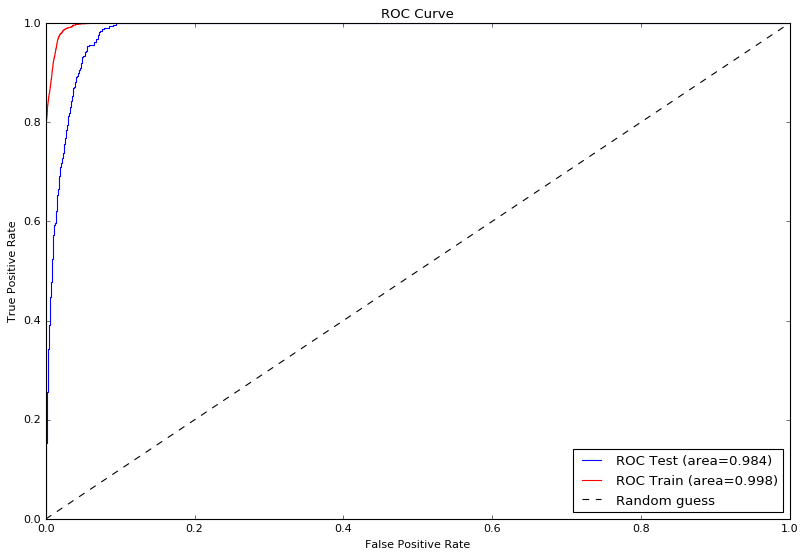

In [216]:
from sklearn.metrics import auc
pfr_final, tpr_final, threshold_final= roc_curve(y_test_new,vote_final.predict_proba(X_test_new)[:,1])
pfr_final_train, tpr_final_train, threshold_final_train= roc_curve(y_train_new,vote_final.predict_proba(X_train_new)[:,1])
roc_auc_final=auc(pfr_final, tpr_final)
roc_auc_final_train=auc(pfr_final_train, tpr_final_train)
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(pfr_final,tpr_final,label='ROC Test (area=%0.3f)' % roc_auc_final,color='blue')
plt.plot(pfr_final_train,tpr_final_train,label='ROC Train (area=%0.3f)' % roc_auc_final_train,color='red')
plt.plot([0,1],[0,1],'k--',label='Random guess')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Conclusions:
- Does a good job on the detection of true positive (similar result to XGBoost and the Deep Neural Network).
- Does a good job on the detection of false positive (However Random Forest  does a detection on false positive).

In [223]:
final_probabilities_test=vote_final.predict_proba(X_test_new)

In [225]:
final_probabilities_train=vote_final.predict_proba(X_train_new)

# Final words:
- final_probabilities_test is the array with probabilities of being a "Good Campaign" for the test set.
- final_probabilities_train is the array with probabilities of being a "Good Campaign" for the train set.

### Helper function for searching the best threshold

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
def find_best_threshold(thresholds, fpr, tpr):
    """
    find the best threshold from the roc curve. by finding the threshold for the point which is closest to (fpr=0,tpr=1)
    """
    fpr_tpr = pd.DataFrame({'thresholds': thresholds, 'fpr': fpr, 'tpr': tpr})
    fpr_tpr['dist'] = (fpr_tpr['fpr'])**2 + (fpr_tpr['tpr']-1)**2
    return fpr_tpr.ix[fpr_tpr.dist.idxmin(), 'thresholds']